In [ ]:
NAME = "Sofie Postma"
STUDENT_NUMBER = "s1053431"
COLLABORATOR_NAME = "Maud van Zundert"
COLLABORATOR_STUDENT_NUMBER = "1055195"

### Imports

In [1]:
## Imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 
from sklearn.neighbors import KNeighborsClassifier
from toolbox.classification_plot import classification_plot
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score 
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from statsmodels.stats.contingency_tables import mcnemar
from matplotlib import pyplot


### Visualizing data

In [2]:
## Visualizing data

# Assigning the train data to a variable
occupancy_data_train = pd.read_excel(r'.\data_training.xlsx')

print(occupancy_data_train.head())

# Printing the mean of every attribute except date
print("\n")
X_means_temp = np.mean(occupancy_data_train['Temperature'])
print("Mean Temperature: ", X_means_temp)
X_means_hum = np.mean(occupancy_data_train['Humidity'])
print("Mean Humidity: ", X_means_hum)
X_means_light = np.mean(occupancy_data_train['Light'])
print("Mean Light: ", X_means_light)
X_means_CO2 = np.mean(occupancy_data_train['CO2'])
print("Mean CO2: ", X_means_CO2)
X_means_humR = np.mean(occupancy_data_train['HumidityRatio'])
print("Mean HumidityRatio: ", X_means_humR)
print("\n")

# Assigning the first test data file to a variable
occupancy_data_test = pd.read_excel(r'.\testdata1.xlsx')
print(occupancy_data_test.head())

# Assigning the second test data file to a variable
occupancy_data_test2 = pd.read_excel(r'.\testdata2.xlsx')


   Unnamed: 0                date  Temperature  Humidity  Light     CO2  \
0           1 2015-02-04 17:51:00        23.18   27.2720  426.0  721.25   
1           2 2015-02-04 17:51:59        23.15   27.2675  429.5  714.00   
2           3 2015-02-04 17:53:00        23.15   27.2450  426.0  713.50   
3           4 2015-02-04 17:54:00        23.15   27.2000  426.0  708.25   
4           5 2015-02-04 17:55:00        23.10   27.2000  426.0  704.50   

   HumidityRatio  Occupancy  
0       0.004793          1  
1       0.004783          1  
2       0.004779          1  
3       0.004772          1  
4       0.004757          1  


Mean Temperature:  20.61908364034621
Mean Humidity:  25.731507286422527
Mean Light:  119.51937451389756
Mean CO2:  606.5462431945632
Mean HumidityRatio:  0.0038625066783203907


                 date  Temperature  Humidity       Light         CO2  \
0 2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000   
1 2015-02-02 14:19:59      23.7180    26.290 

In [3]:
## Check for missing data in training data
print("The train data set contains:", len(occupancy_data_train), "data points.")
for key in occupancy_data_train.keys():
    print(key,": ", occupancy_data_train[key].isna().sum(), "missing value(s).")
print("\n")

## Check for missing data in test data 1
print("The test data set (test1) contains:", len(occupancy_data_test), "data points.")
for key in occupancy_data_test.keys():
    print(key,": ", occupancy_data_test[key].isna().sum(), "missing value(s).")    
print("\n") 

## Check for missing data in test data 2
print("The test data set (test2) contains:", len(occupancy_data_test2), "data points.")
for key in occupancy_data_test2.keys():
    print(key,": ", occupancy_data_test2[key].isna().sum(), "missing value(s).")    
print("\n")    

The train data set contains: 8143 data points.
Unnamed: 0 :  0 missing value(s).
date :  0 missing value(s).
Temperature :  0 missing value(s).
Humidity :  0 missing value(s).
Light :  0 missing value(s).
CO2 :  0 missing value(s).
HumidityRatio :  0 missing value(s).
Occupancy :  0 missing value(s).


The test data set (test1) contains: 2665 data points.
date :  0 missing value(s).
Temperature :  0 missing value(s).
Humidity :  0 missing value(s).
Light :  0 missing value(s).
CO2 :  0 missing value(s).
HumidityRatio :  0 missing value(s).
Occupancy :  0 missing value(s).


The test data set (test2) contains: 9752 data points.
date :  0 missing value(s).
Temperature :  0 missing value(s).
Humidity :  0 missing value(s).
Light :  0 missing value(s).
CO2 :  0 missing value(s).
HumidityRatio :  0 missing value(s).
Occupancy :  0 missing value(s).




In [4]:
## converted 'date' into integer of the hour only

# converts column of data into list of integers 
def toHour(data):
    dates = []
    for date in data:
        date = str(date)
        new_date = date.split()
        new_date = new_date[1:]
        new_date = new_date[0]
        dates.append(int(new_date[0:2]))
    return dates

# Replace 'date' column with dates array made above
occupancy_data_train['date'] = toHour(occupancy_data_train['date'])
occupancy_data_test['date'] = toHour(occupancy_data_test['date'])
occupancy_data_test2['date'] = toHour(occupancy_data_test2['date'])
#Only run ONCE!!! after this the column is already changed, thus the for loop will result in errors.

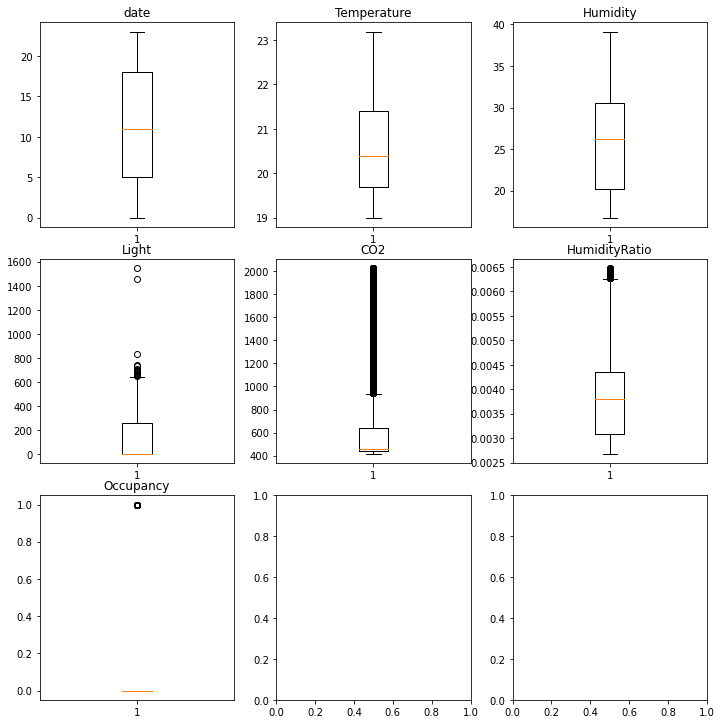

Figure 1: boxplots of all attributes of train data


In [5]:
## Boxplots of data 

attributes = ['date','Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']
f, axarr = plt.subplots(3, 3, figsize=(10, 10))
f.tight_layout()
number_attribute = 0
for i in range (0,3):
    for j in range (0,3):
        axarr[i, j].boxplot(occupancy_data_train['{}'.format(attributes[number_attribute])])
        axarr[i, j].set_title('{}'.format(attributes[number_attribute]))
        number_attribute +=1
        if number_attribute == 7:
            break

plt.show()                        
print("Figure 1: boxplots of all attributes of train data")            

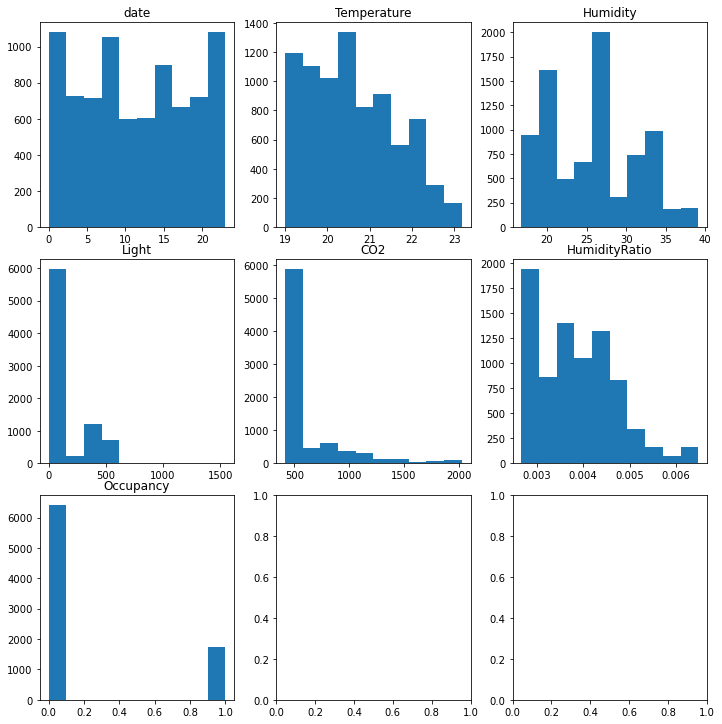

Figure 2: histograms of all attributes of train data


In [6]:
##  Histograms of data 
    
f, axarr = plt.subplots(3, 3, figsize=(10, 10))
f.tight_layout()
number_attribute = 0
for i in range (0,3):
    for j in range (0,3):
        axarr[i, j].hist(occupancy_data_train['{}'.format(attributes[number_attribute])])
        axarr[i, j].set_title('{}'.format(attributes[number_attribute]))
        number_attribute +=1
        if number_attribute == 7:
            break
            
plt.show()            
print("Figure 2: histograms of all attributes of train data")                        

### Normalizing Data

In [7]:
# Normalize train data:

features = ['date', 'Temperature', 'Humidity', 'Light', 'HumidityRatio', 'CO2']
scaler = MinMaxScaler()
scaler.fit(occupancy_data_train)
scaled = scaler.fit_transform(occupancy_data_train)
scaled_df = pd.DataFrame(scaled, columns=occupancy_data_train.columns)
occupancy_data_train = scaled_df
print(occupancy_data_train.head())

train_data_x = occupancy_data_train[features].values
train_data_y = occupancy_data_train[['Occupancy']].values

   Unnamed: 0     date  Temperature  Humidity     Light       CO2  \
0    0.000000  0.73913     1.000000  0.470533  0.275490  0.190933   
1    0.000123  0.73913     0.992823  0.470332  0.277754  0.186446   
2    0.000246  0.73913     0.992823  0.469326  0.275490  0.186136   
3    0.000368  0.73913     0.992823  0.467315  0.275490  0.182887   
4    0.000491  0.73913     0.980861  0.467315  0.275490  0.180566   

   HumidityRatio  Occupancy  
0       0.557318        1.0  
1       0.554807        1.0  
2       0.553761        1.0  
3       0.551669        1.0  
4       0.547851        1.0  


In [8]:
# Normalize the test data set 1
scaler1 = MinMaxScaler()
scaler1.fit(occupancy_data_test)
scaled1 = scaler1.fit_transform(occupancy_data_test)
scaled_df_test1 = pd.DataFrame(scaled1, columns=occupancy_data_test.columns)
occupancy_data_test = scaled_df_test1

# Split into x and y
test1_data_x = occupancy_data_test[features].values
test1_data_y = occupancy_data_test[['Occupancy']].values

# Normalize the tests data set 2
scaler2 = MinMaxScaler()
scaler2.fit(occupancy_data_test)
scaled2 = scaler2.fit_transform(occupancy_data_test2)
scaled_df_test2 = pd.DataFrame(scaled2, columns=occupancy_data_test2.columns)
occupancy_data_test2 = scaled_df_test2

# Split into x and y
test2_data_x = occupancy_data_test2[features].values
test2_data_y = occupancy_data_test2[['Occupancy']].values


### Decision Tree Classifier

In [9]:
## Decision Tree Classifier

dtc = DecisionTreeClassifier()
dtc.fit(train_data_x, train_data_y)

# Creating dictionary
param_dict = {
    "criterion":['gini', 'entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5),
}

# Tuning parameters, to find the best ones
search = GridSearchCV(dtc,
    param_grid=param_dict, cv=10, verbose = 1, n_jobs=-1)
search.fit(train_data_x, train_data_y)

print(f"The best parameters found are: {search.best_params_}")
print(f"The mean CV score of the best model is: {search.best_score_:.3f}")
print("best score: ", search.best_score_)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:    7.6s


The best parameters found are: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
The mean CV score of the best model is: 0.976
best score:  0.9761797380202288


[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:   13.6s finished


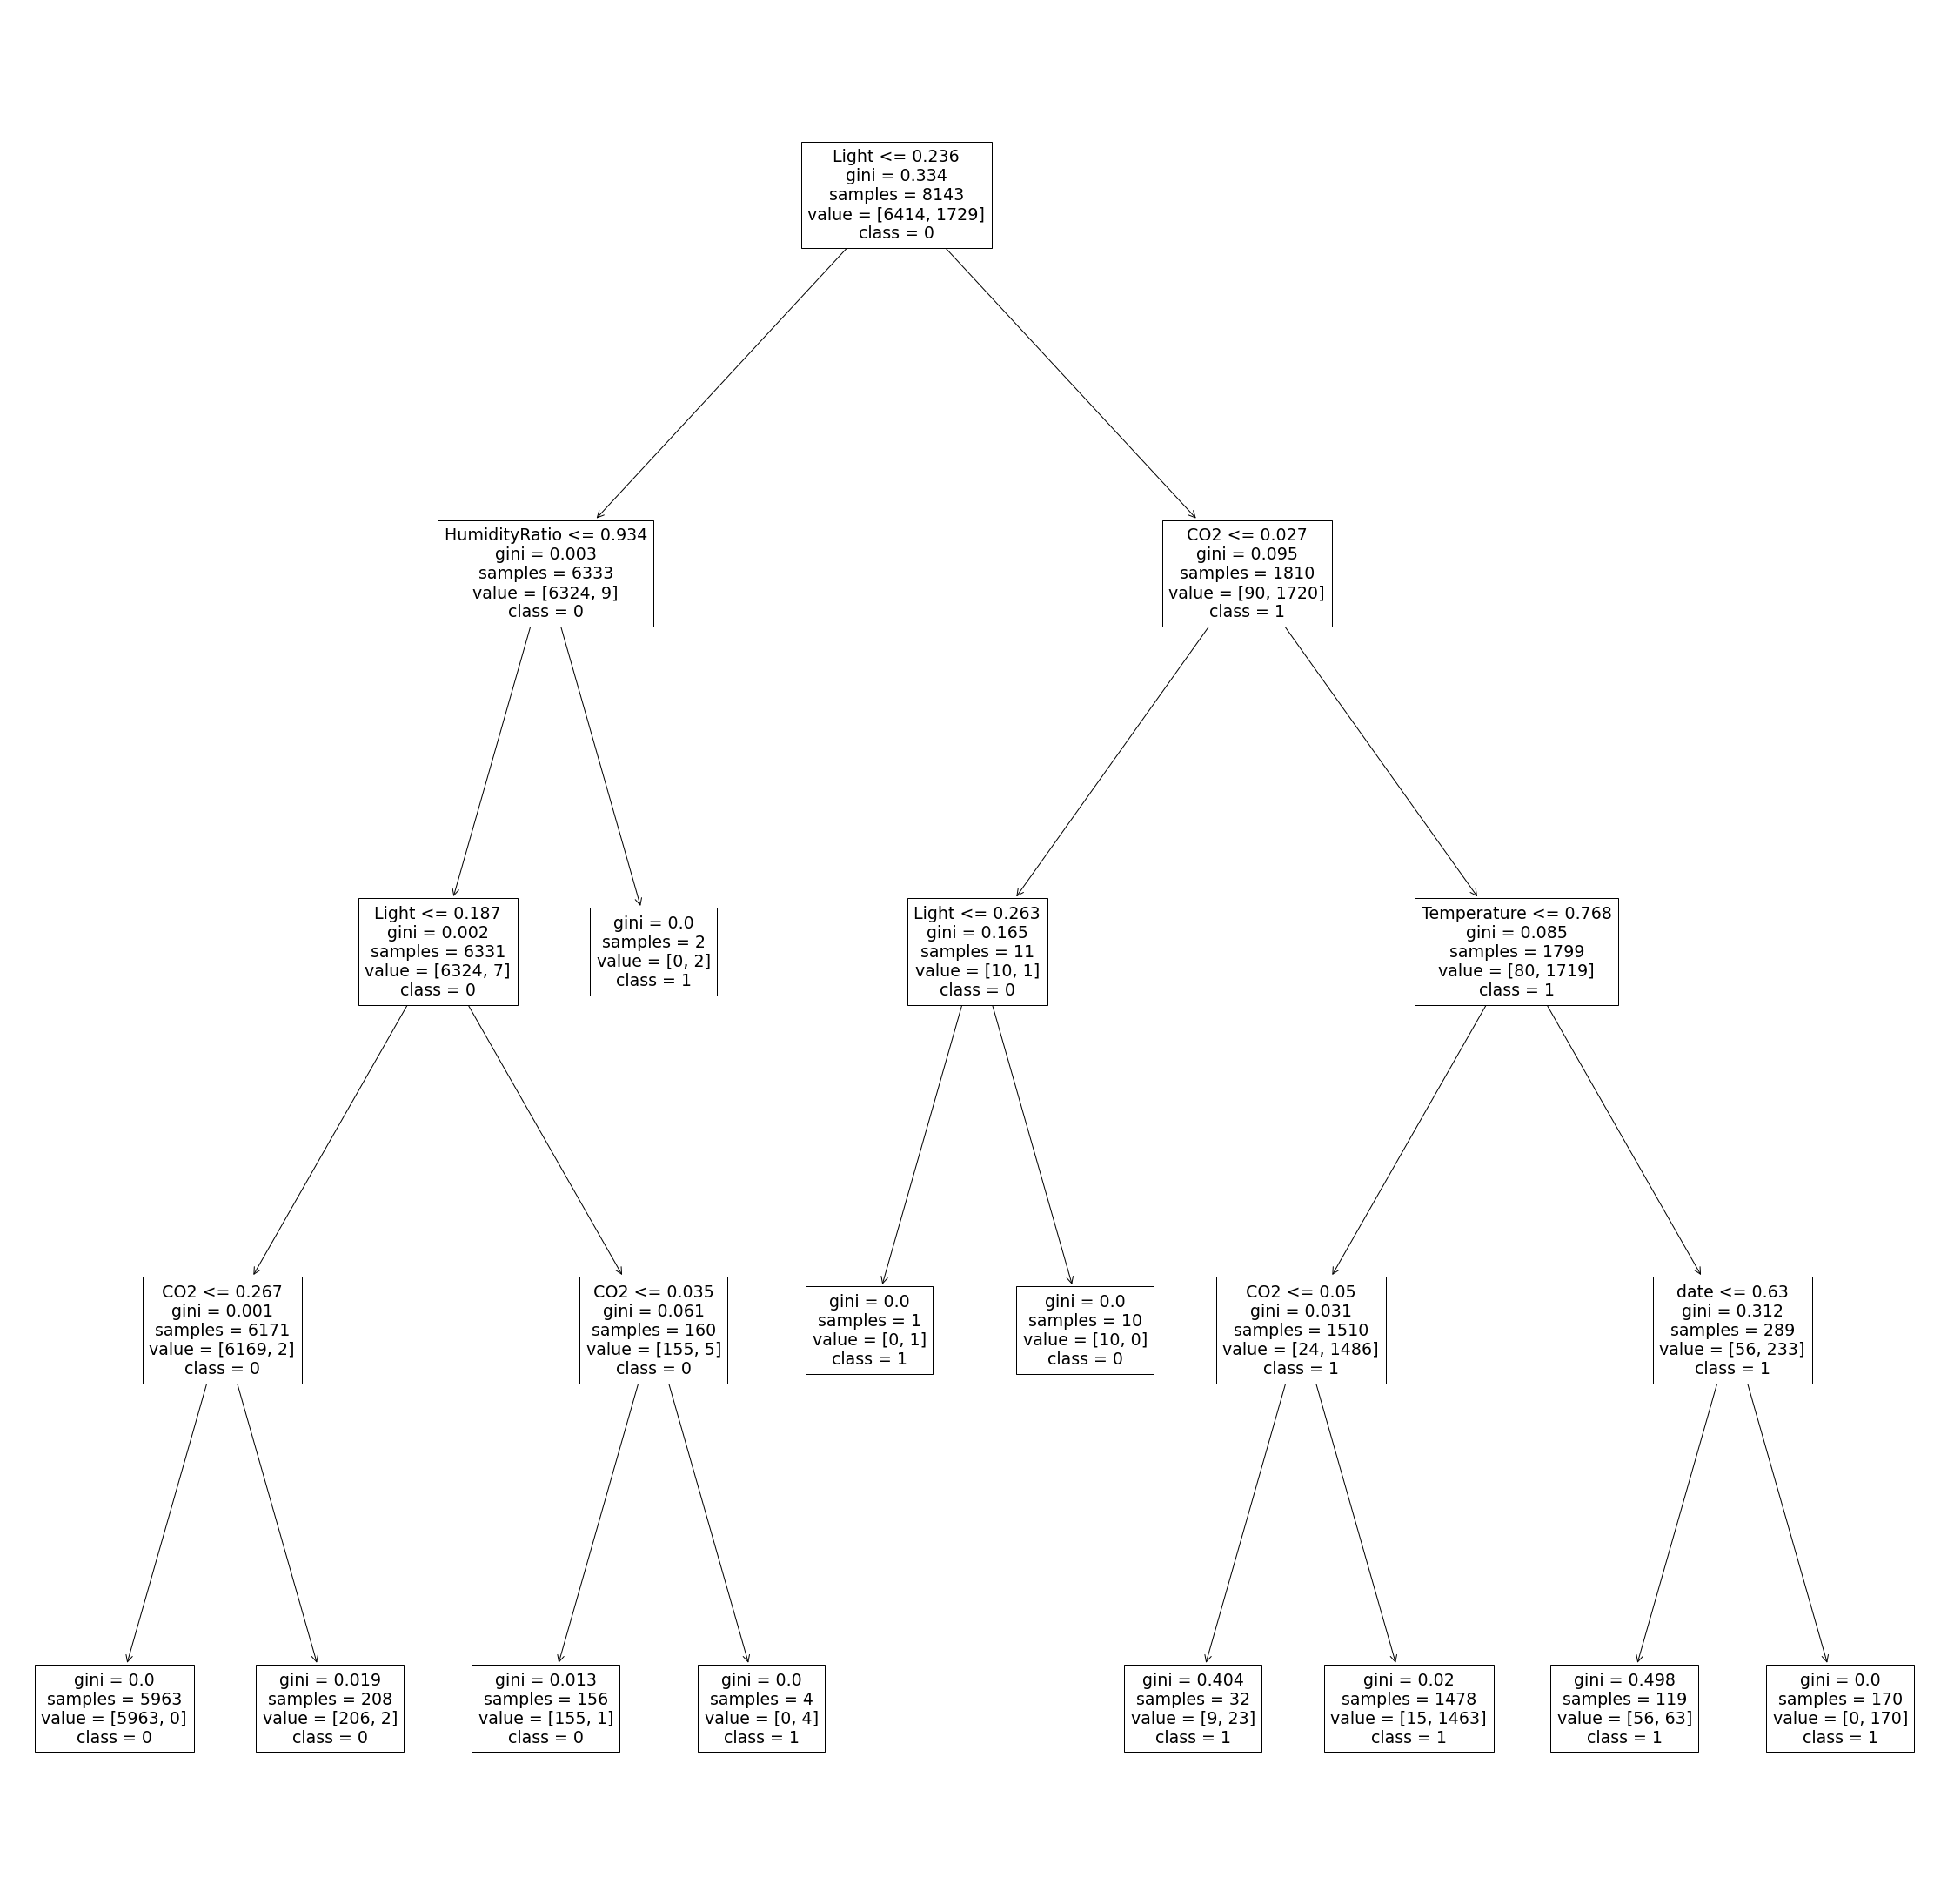

Figure 3: decision tree trained on trainig data 

Accuracy of the model on test data 1 is:  0.9782363977485928
Accuracy of the model on test data 2 is:  0.9843109105824446


In [10]:
# Create a model with the parameters, fit and plot decision tree. Make prediction and find accuracy on test data

plt.figure(figsize = (40,40))
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth =  4, min_samples_leaf = 1, min_samples_split = 2)
dtc = dtc.fit(train_data_x, train_data_y) 

plot_tree(dtc, feature_names= features, class_names = ['0', '1'] ) # 0 = unoccupied, 1 = occupied
plt.show()

print("Figure 3: decision tree trained on trainig data \n")  

# Test on first test data
pred_dct1 = dtc.predict(test1_data_x)        
print('Accuracy of the model on test data 1 is: ', accuracy_score(test1_data_y, pred_dct1))
# Test on second test data
pred_dct2 = dtc.predict(test2_data_x)        
print('Accuracy of the model on test data 2 is: ' , accuracy_score(test2_data_y, pred_dct2))

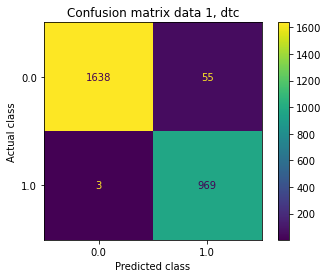

Figure 4: confusion matrix of decision tree classifier on test data 1


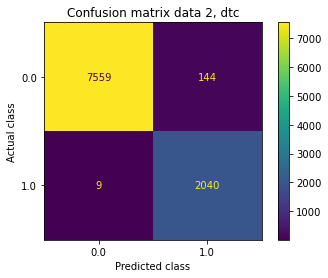

Figure 5: confusion matrix of decision tree classifier on test data 2


In [11]:
# Confusion Matrix Decision Tree
plot_confusion_matrix(dtc, test1_data_x, test1_data_y)
plt.title('Confusion matrix data 1, dtc')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.show()
print("Figure 4: confusion matrix of decision tree classifier on test data 1")            

plot_confusion_matrix(dtc, test2_data_x, test2_data_y)
plt.title('Confusion matrix data 2, dtc')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.show()
print("Figure 5: confusion matrix of decision tree classifier on test data 2")            

Feature: 0, Score: 0.01185
Feature: 1, Score: 0.00587
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.96979
Feature: 4, Score: 0.00153
Feature: 5, Score: 0.01097


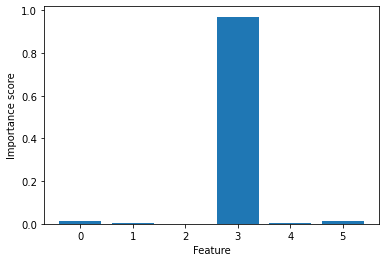

Figure 6: Importance score of the features on prediction


In [12]:
# Find importance of features
importance = dtc.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel("Feature")
pyplot.ylabel("Importance score")
pyplot.show()
print("Figure 6: Importance score of the features on prediction")

### KNeighborsClassifier

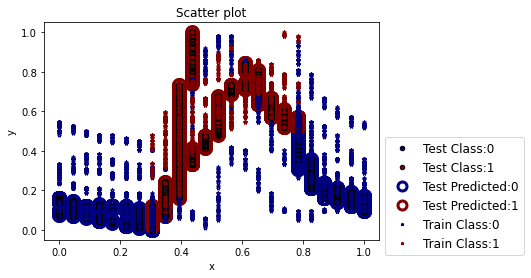

Figure 7: classification plot of occupancy data with test data 1


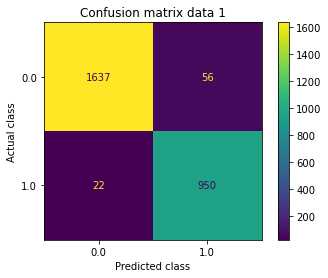

Figure 8: confusion matrix of K Nearest Neighbour classifier on test data 1
Accuracy on test data 1: 0.9707317073170731


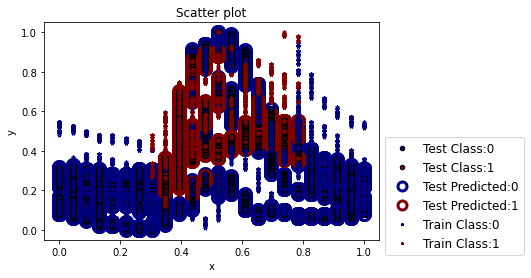

Figure 9: classification plot of occupancy data with test data 2


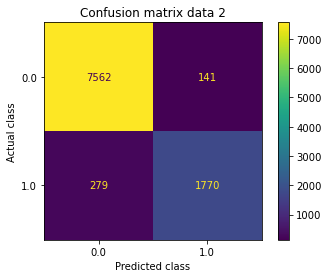

Figure 10: confusion matrix of K Nearest Neighbour classifier on test data 2
Accuracy on test data 2: 0.9569319114027892


In [13]:
## KNeighborsClassifier

nbc = KNeighborsClassifier(n_neighbors=8, metric = 'cityblock')
train_data_y = train_data_y.ravel() 

nbc.fit(train_data_x, train_data_y)

# Test on test data 1
pred_nbc1 = nbc.predict(test1_data_x)
classification_plot(test1_data_x, test1_data_y, pred_nbc1, train_data_x, train_data_y)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("Figure 7: classification plot of occupancy data with test data 1")
plot_confusion_matrix(nbc, test1_data_x, test1_data_y)
plt.title('Confusion matrix data 1')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.show()
print("Figure 8: confusion matrix of K Nearest Neighbour classifier on test data 1")
print("Accuracy on test data 1:",metrics.accuracy_score(test1_data_y, pred_nbc1))

# test on test data 2
pred_nbc2 = nbc.predict(test2_data_x)
classification_plot(test2_data_x, test2_data_y, pred_nbc2, train_data_x, train_data_y)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("Figure 9: classification plot of occupancy data with test data 2")
plot_confusion_matrix(nbc, test2_data_x, test2_data_y)
plt.title('Confusion matrix data 2')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.show()
print("Figure 10: confusion matrix of K Nearest Neighbour classifier on test data 2")
print("Accuracy on test data 2:",metrics.accuracy_score(test2_data_y, pred_nbc2))

Confusion Matrix:
[[1632   61]
 [   9  963]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      1693
         1.0       0.94      0.99      0.96       972

    accuracy                           0.97      2665
   macro avg       0.97      0.98      0.97      2665
weighted avg       0.97      0.97      0.97      2665



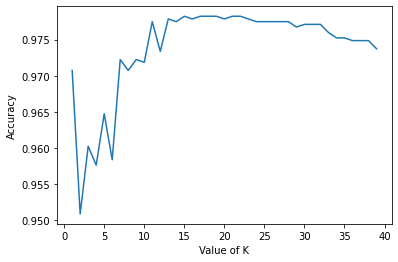

Figure 11: accuracy vs K to find the optimal number of neighbours for test data file 1


In [14]:
## Try to find best amount of neighbours for KNeighborsClassifier

X = occupancy_data_train[features].to_numpy() 
labels = occupancy_data_train['Occupancy']

le = LabelEncoder()
y = le.fit_transform(labels)

mean_errors = []
loo = LeaveOneOut()
loo.get_n_splits(X)

range_k = range(1,40)
scores = {}
scores_list = []
for k in range_k:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='cityblock')
    classifier.fit(train_data_x, train_data_y)
    y_pred = classifier.predict(test1_data_x)
    scores[k] = metrics.accuracy_score(test1_data_y, y_pred)
    scores_list.append(metrics.accuracy_score(test1_data_y, y_pred))
result = metrics.confusion_matrix(test1_data_y, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(test1_data_y, y_pred)
print("Classification Report:",)
print (result1)
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.show()
print("Figure 11: accuracy vs K to find the optimal number of neighbours for test data file 1")


As visible, the accuracy is the highest when K is around 15. 

In [15]:
## Test this amount of neighbours on both test sets

nbc = KNeighborsClassifier(n_neighbors=15, metric = 'cityblock')
nbc.fit(train_data_x, train_data_y)

# test on test data 1 
predict = nbc.predict(test1_data_x)
std_score1 = metrics.accuracy_score(test1_data_y, predict)
print("Accuracy on test data 1:",std_score1)

# test on test data 2
predict = nbc.predict(test2_data_x)
std_score2 = metrics.accuracy_score(test2_data_y, predict)
print("Accuracy on test data 2:", std_score2)

Accuracy on test data 1: 0.9782363977485928
Accuracy on test data 2: 0.9532403609515997


### Feature Importance 

In [61]:
data = {'date': [0], 'Temperature': [0], 'Humidity': [0], 'Light': [0], 'HumidityRatio': [0], 'CO2': [0]}
feat_imp1 = pd.DataFrame(data)
feat_imp2 = pd.DataFrame(data)

for feature in features:
    print('randomized variable: {}'.format(feature))
    occupacy_train_copy = occupancy_data_train.copy()
    occupacy_train_copy[feature] = np.random.permutation(occupacy_train_copy[feature])
    
    train_data_x_copy = occupacy_train_copy[features].values
    nbc = KNeighborsClassifier(n_neighbors=15, metric = 'cityblock')
    nbc.fit(train_data_x_copy, train_data_y)

    # test on test data 1 
    predict = nbc.predict(test1_data_x)
    print("Accuracy on test data 1:",metrics.accuracy_score(test1_data_y, predict))
    feat_imp1[feature] = (std_score1 - metrics.accuracy_score(test1_data_y, predict))

    # test on test data 2
    predict = nbc.predict(test2_data_x)
    print("Accuracy on test data 2:",metrics.accuracy_score(test2_data_y, predict))
    feat_imp2[feature] = (std_score2 - metrics.accuracy_score(test2_data_y, predict))
    print("------------------------------------------------------")

print("Accuracy difference with train on test data 1: ")
print(feat_imp1.head())
print("------------------------------------------------------")
print("Accuracy difference with train on test data 2: ")
print(feat_imp2.head())

randomized variable: date
Accuracy on test data 1: 0.9594746716697936
Accuracy on test data 2: 0.9728260869565217
------------------------------------------------------
randomized variable: Temperature
Accuracy on test data 1: 0.9703564727954972
Accuracy on test data 2: 0.9613412633305989
------------------------------------------------------
randomized variable: Humidity
Accuracy on test data 1: 0.9696060037523452
Accuracy on test data 2: 0.9649302707136997
------------------------------------------------------
randomized variable: Light
Accuracy on test data 1: 0.9148217636022514
Accuracy on test data 2: 0.8222928630024611
------------------------------------------------------
randomized variable: HumidityRatio
Accuracy on test data 1: 0.9628517823639775
Accuracy on test data 2: 0.9519073010664479
------------------------------------------------------
randomized variable: CO2
Accuracy on test data 1: 0.9666041275797373
Accuracy on test data 2: 0.9613412633305989
---------------------

### Comparing Classifiers

In [16]:
# MCNemar's sign test

# first test file
mcn = pd.crosstab(pred_dct1, pred_nbc1)
print(mcn)
print("\n")
print(mcnemar(mcn, exact=False))

# second test file
print("\n")
mcn2 = pd.crosstab(pred_dct2, pred_nbc2)
print(mcn2)
print("\n")
print(mcnemar(mcn2, exact=False))

col_0   0.0   1.0
row_0            
0.0    1639     2
1.0      20  1004


pvalue      0.00028961940975555226
statistic   13.136363636363637


col_0   0.0   1.0
row_0            
0.0    7513    55
1.0     328  1856


pvalue      6.463689747045699e-44
statistic   193.16971279373368


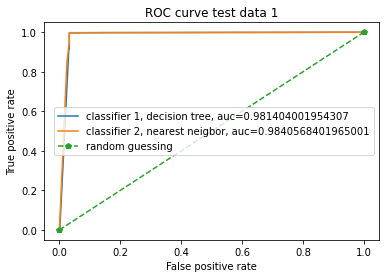

Figure 12: ROC curve to compare decision tree and nearest neighbour classifiers for test data file 1


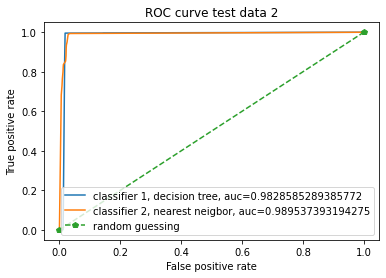

Figure 13: ROC curve to compare decision tree and nearest neighbour classifiers for test data file 2


In [17]:
# Calculating ROC curves to compare both of the classifiers

# Predicted probability decision tree
predp_dct1 = dtc.predict_proba(test1_data_x)[::,1]

# Predicted probability nearest neighbour
predp_nbc1 = nbc.predict_proba(test1_data_x)[::,1]

fpr1, tpr1, thresholds1 = metrics.roc_curve(test1_data_y, predp_dct1) # decision tree
fpr2, tpr2, thresholds2 = metrics.roc_curve(test1_data_y, predp_nbc1) # nearest neighbor

# Calculating AUC
auc1 = metrics.roc_auc_score(test1_data_y, predp_dct1)
auc2 = metrics.roc_auc_score(test1_data_y, predp_nbc1)

# Plot ROC curve
plt.title("ROC curve test data 1")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot(fpr1, tpr1, label = "classifier 1, decision tree, auc="+str(auc1))
plt.plot(fpr2, tpr2, label = "classifier 2, nearest neigbor, auc="+str(auc2))
plt.plot([0, 1], [0, 1],'p--', label = "random guessing")
plt.legend()
plt.show()
print("Figure 12: ROC curve to compare decision tree and nearest neighbour classifiers for test data file 1")


# Also for test data 2
predp_dct2 = dtc.predict_proba(test2_data_x)[::,1]

predp_nbc2 = nbc.predict_proba(test2_data_x)[::,1]

fpr1, tpr1, thresholds1 = metrics.roc_curve(test2_data_y, predp_dct2) # decision tree
fpr2, tpr2, thresholds2 = metrics.roc_curve(test2_data_y, predp_nbc2) # nearest neighbor

# Calculating AUC
auc3 = metrics.roc_auc_score(test2_data_y, predp_dct2)
auc4 = metrics.roc_auc_score(test2_data_y, predp_nbc2)

# Plot ROC curve 
plt.title("ROC curve test data 2")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot(fpr1, tpr1, label = "classifier 1, decision tree, auc="+str(auc3))
plt.plot(fpr2, tpr2, label = "classifier 2, nearest neigbor, auc="+str(auc4))
plt.plot([0, 1], [0, 1],'p--', label = "random guessing")
plt.legend()
plt.show()
print("Figure 13: ROC curve to compare decision tree and nearest neighbour classifiers for test data file 2")